In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
88,877 cases (7 day average) as of Wed 26 Jan, +9,362.7 since Tue 25 Jan
1,524 hospitalised (7 day average) as of Sat 29 Jan, +6.9 since Fri 28 Jan
213 died (7 day average) as of Wed 26 Jan, -5.7 since Tue 25 Jan


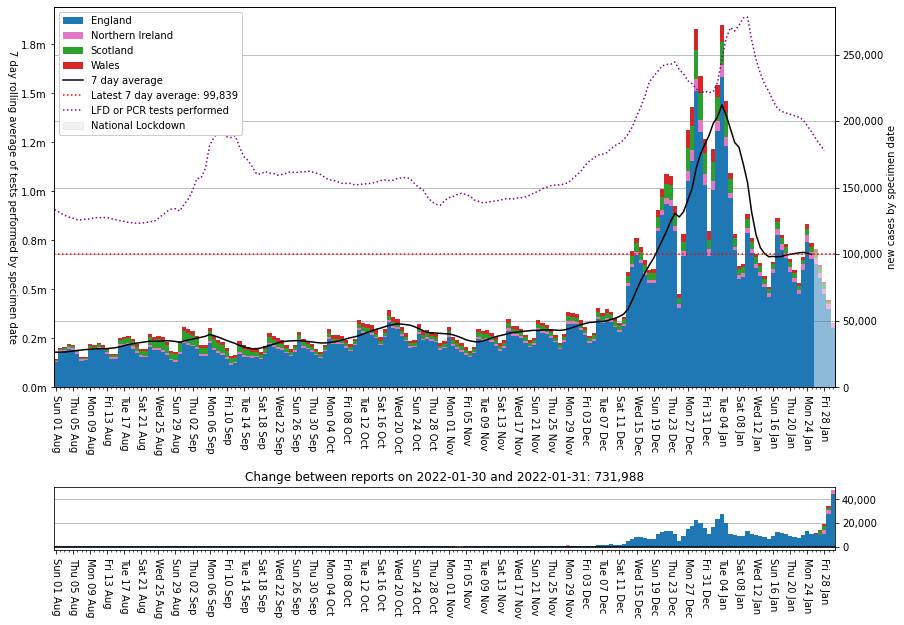

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

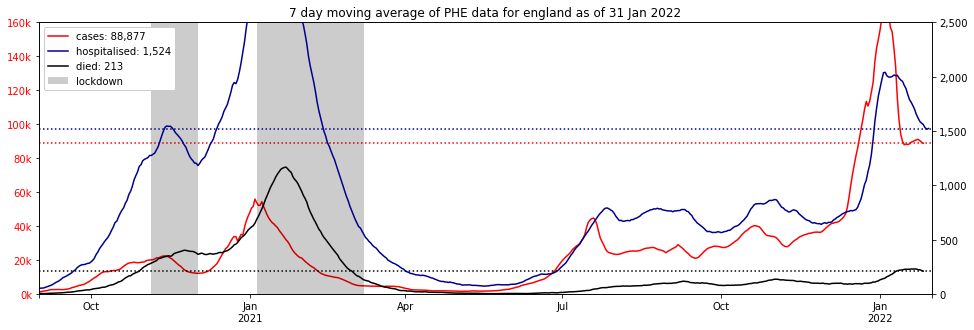

In [4]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=160_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2500)

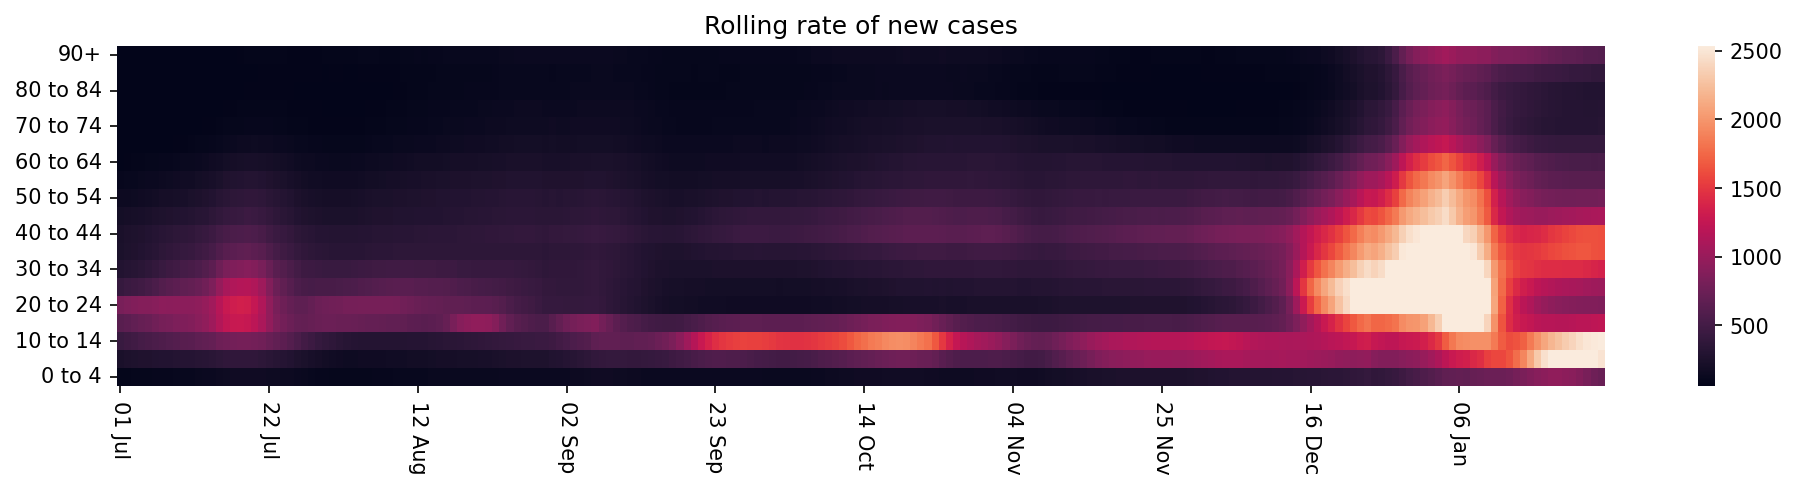

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

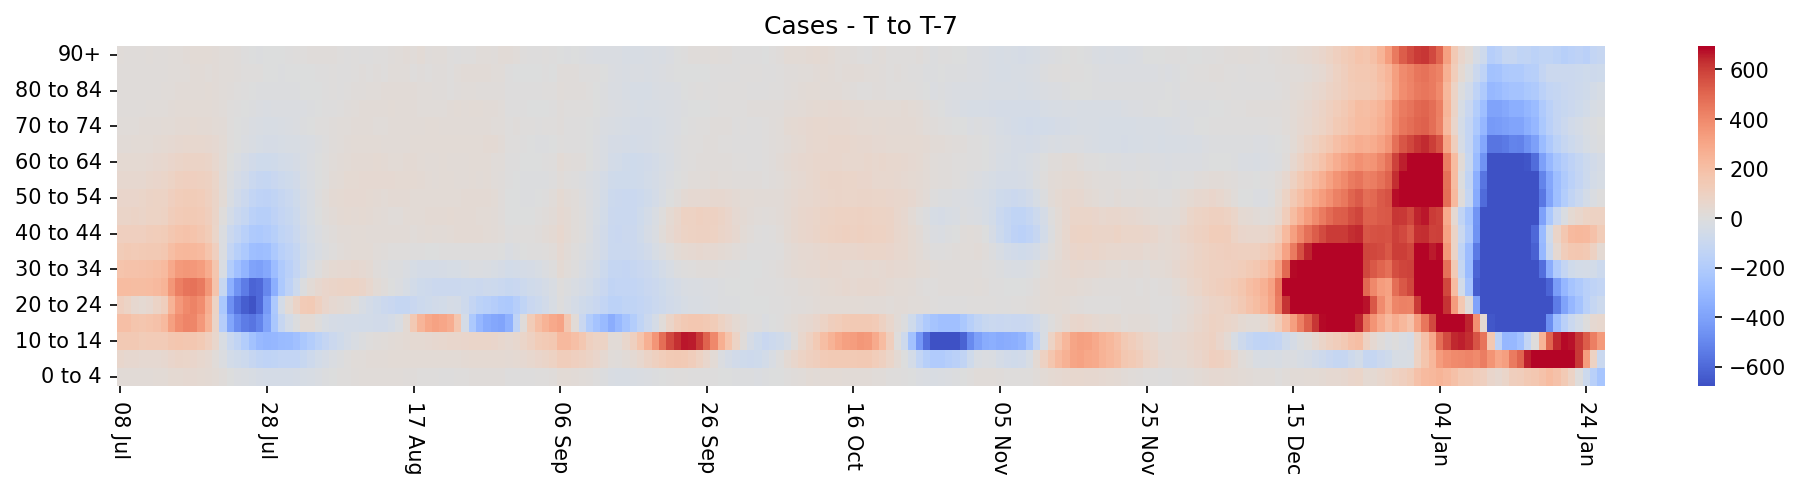

In [6]:
heatmap(diff(data, days=7), title='Cases - T to T-7', figsize=(16, 3), center=0, cmap='coolwarm')

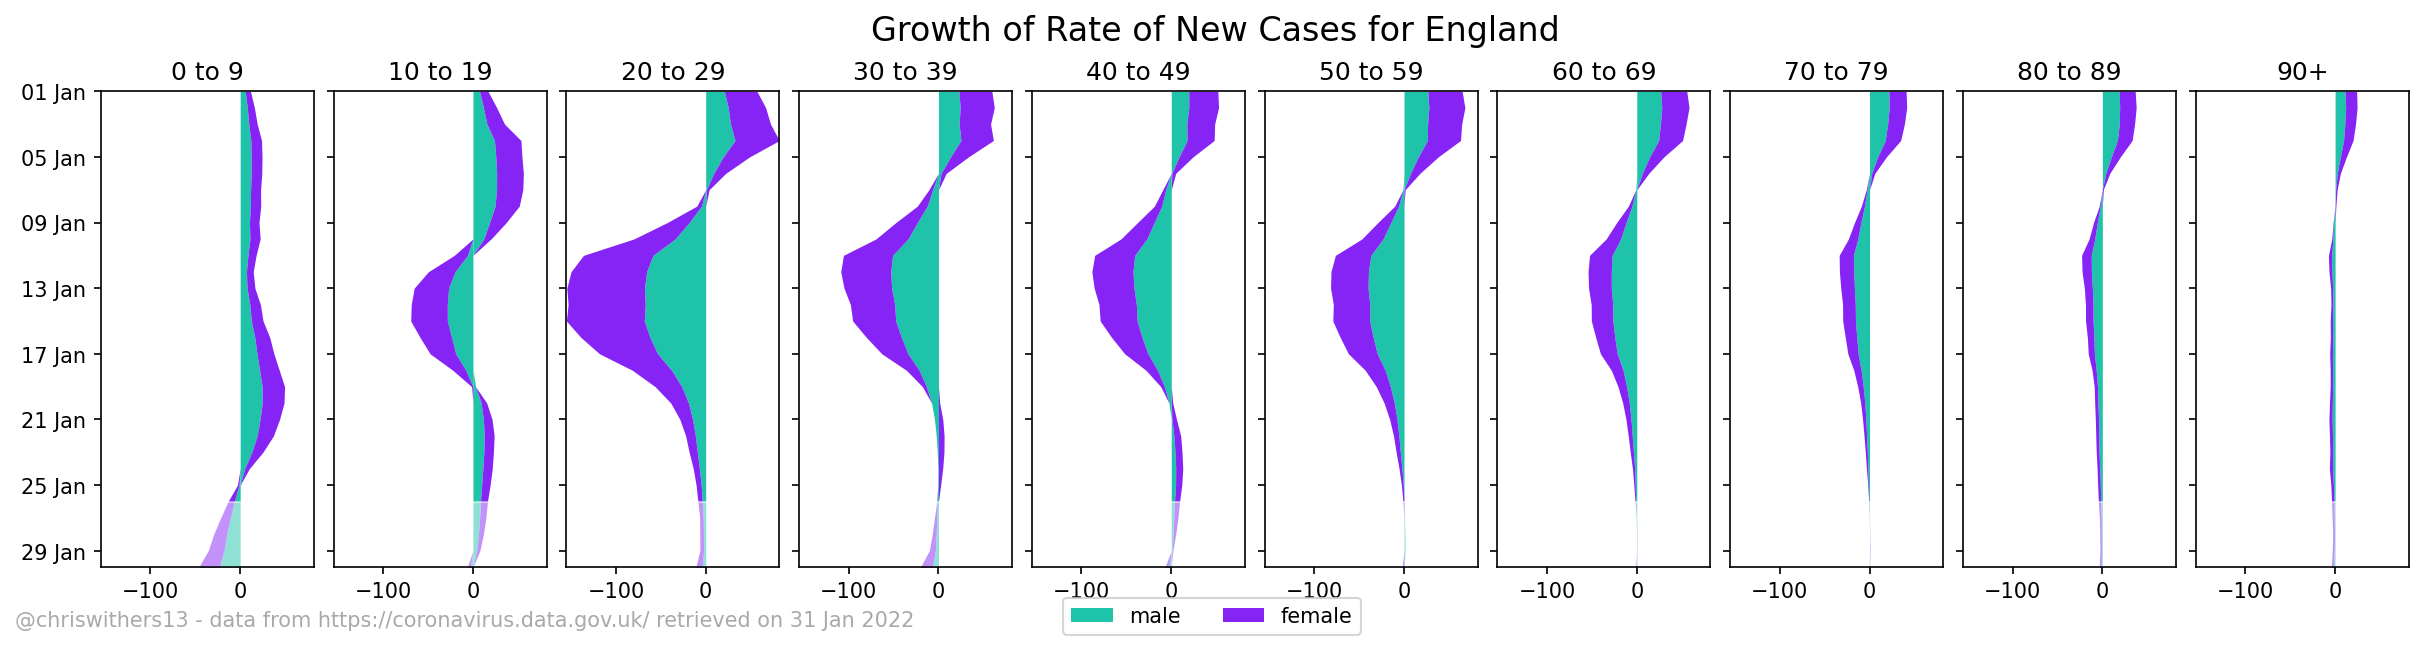

In [7]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

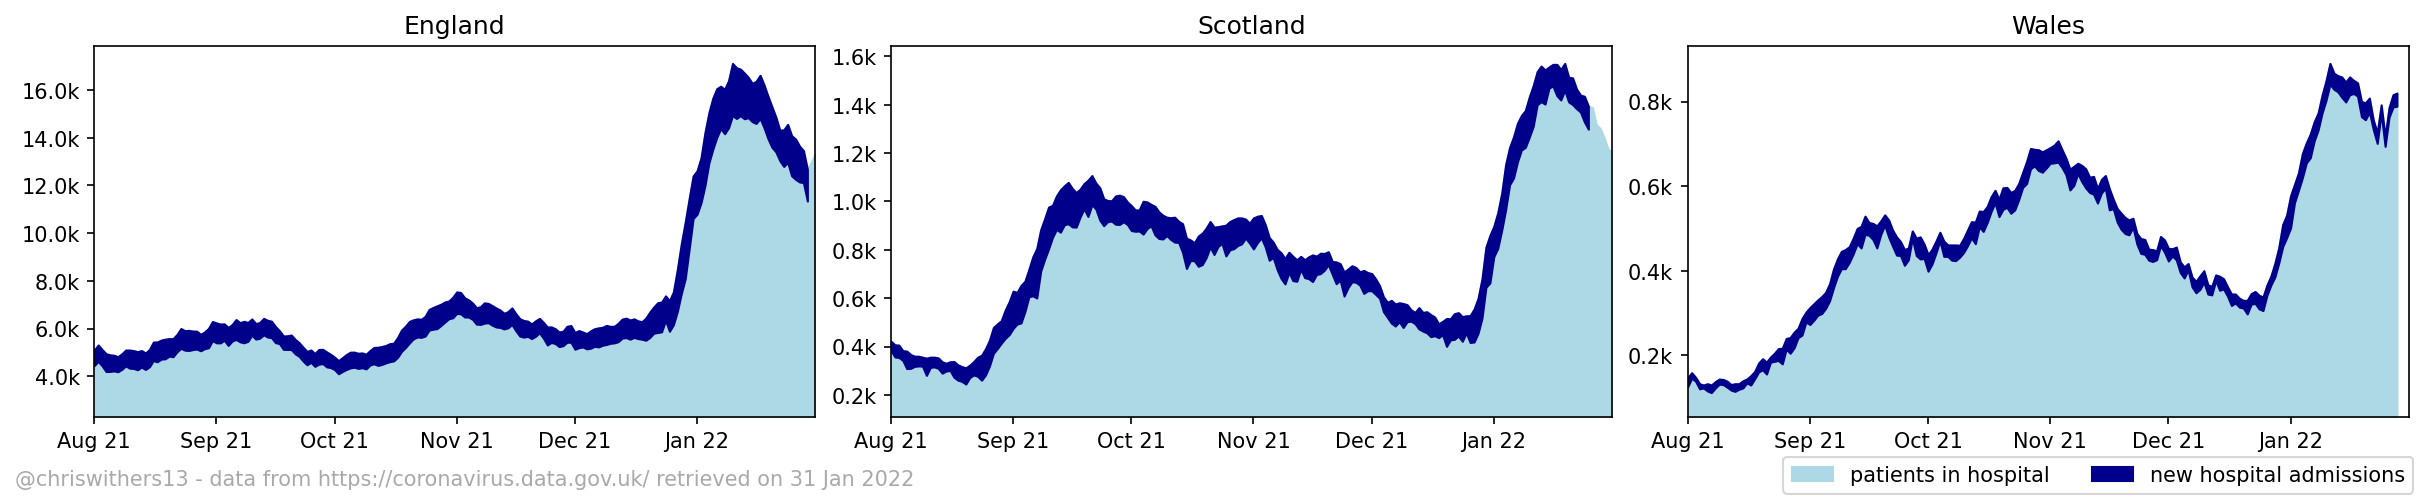

In [8]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

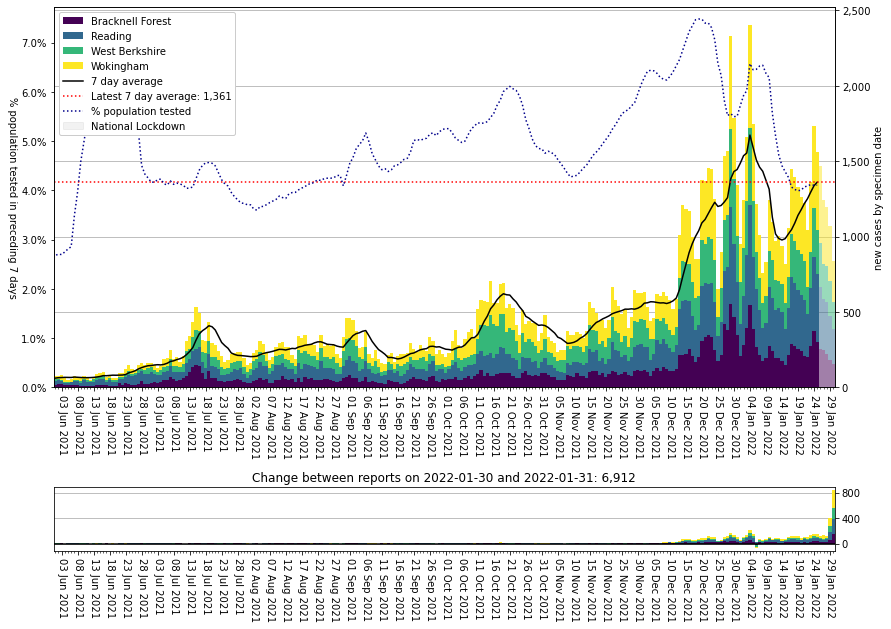

In [9]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

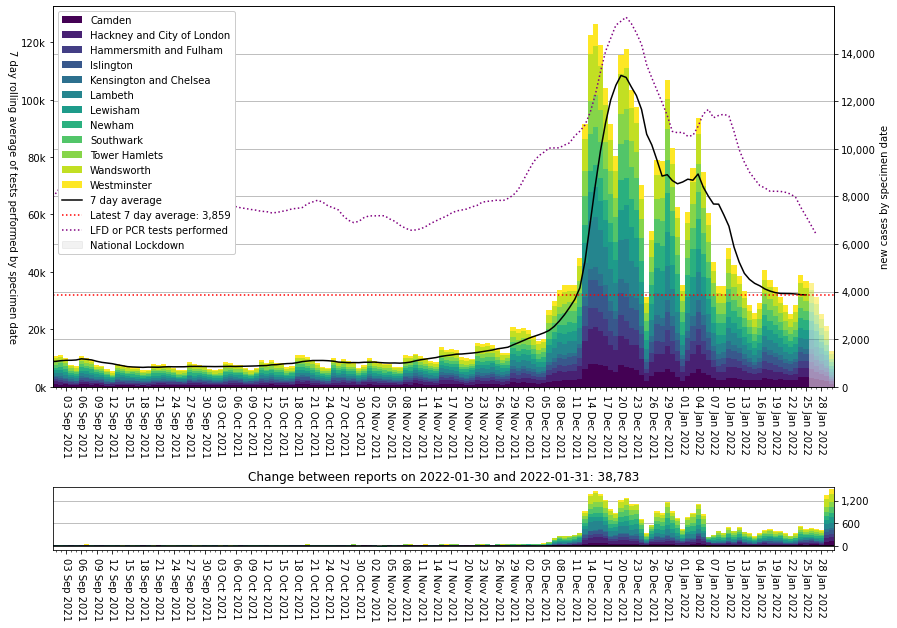

In [10]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [11]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                              
N09000002  Armagh City, Banbridge and Craigavon         2042.968479   
N09000007               Lisburn and Castlereagh         1999.972603   
E06000041                             Wokingham         1875.887540   
E07000008                             Cambridge         1858.202856   
E06000031                          Peterborough         1814.999580   
N09000010                Newry, Mourne and Down         1783.114993   
N09000001               Antrim and Newtownabbey         1776.257108   
E07000217                                Woking         1773.932714   
N09000008                   Mid and East Antrim         1739.736060   
E07000178                                Oxford         1728.356192   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
N09000002                  4417.0    2022-01-29  
N09000007                  2920.0    2022-01-29  
E06000041                  3210.0    2022-01-29  
E07000008                  2319.0    2022-01-29  
E06000031                  3671.0    2022-01-29  
N09000010                  3234.0    2022-01-29  
N09000001                  2549.0    2022-01-29  
E07000217                  1788.0    2022-01-29  
N09000008                  2423.0    2022-01-29  
E07000178                  2635.0    2022-01-29

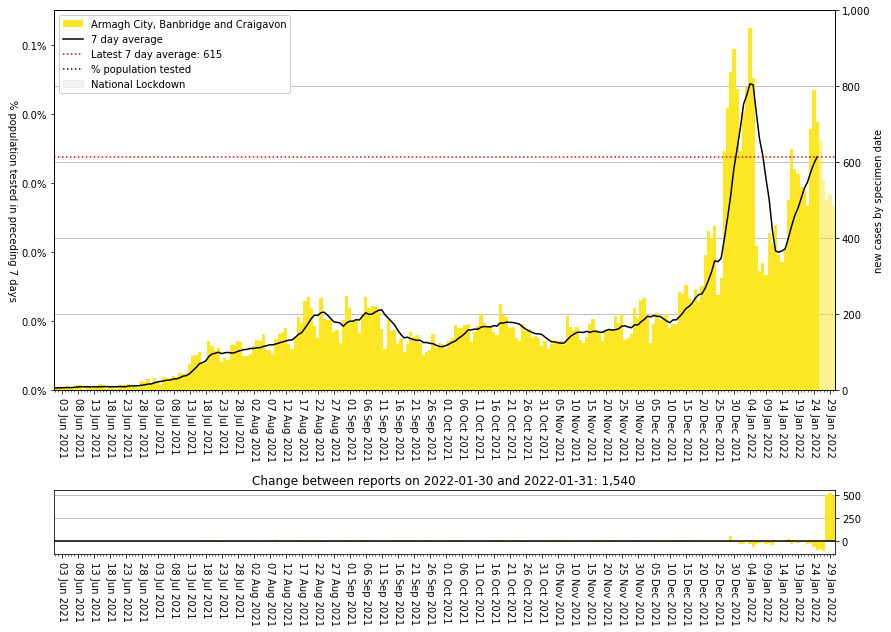

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          870.543065   
E08000035                                Leeds         1016.089235   
E06000047                        County Durham         1170.169819   
E06000054                            Wiltshire         1186.543046   
E08000019                            Sheffield          968.277499   
E08000032                             Bradford         1038.208442   
E06000023                     Bristol, City of         1207.008548   
E06000052         Cornwall and Isles of Scilly          938.786503   
N09000003                              Belfast         1538.094323   
E06000058  Bournemouth, Christchurch and Poole         1134.998267   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  9940.0    2022-01-29  
E08000035                  8059.0    2022-01-29  
E06000047                  6203.0    2022-01-29  
E06000054                  5933.0    2022-01-29  
E08000019                  5663.0    2022-01-29  
E08000032                  5604.0    2022-01-29  
E06000023                  5593.0    2022-01-29  
E06000052                  5368.0    2022-01-29  
N09000003                  5284.0    2022-01-29  
E06000058                  4487.0    2022-01-29

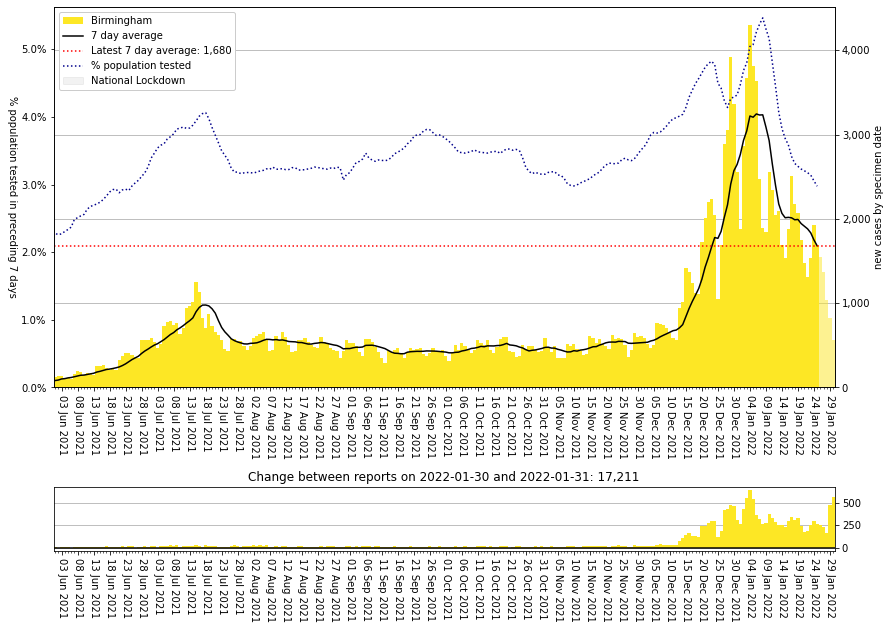

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

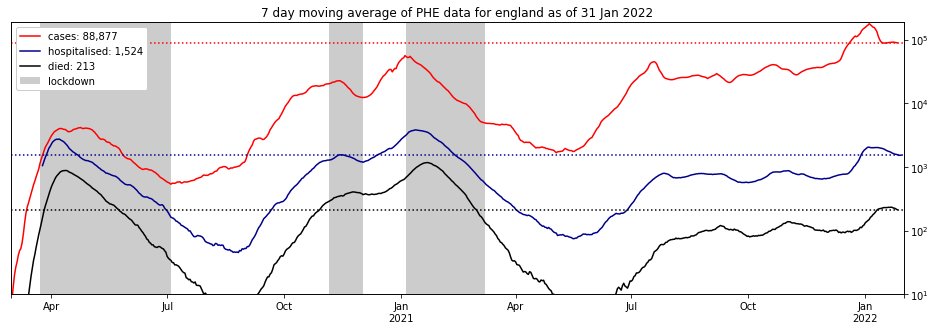

In [16]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

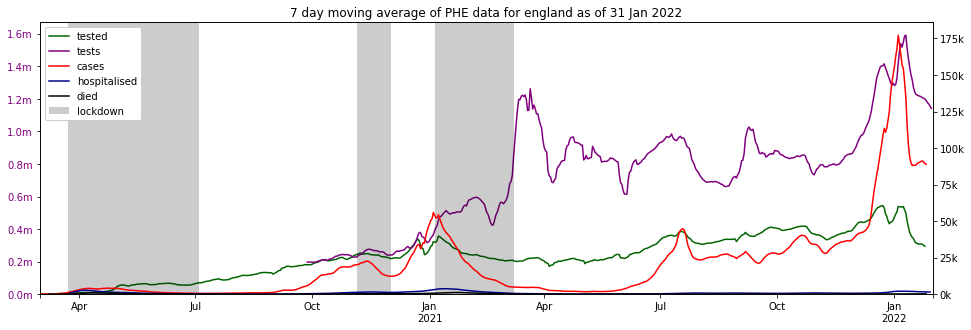

In [17]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

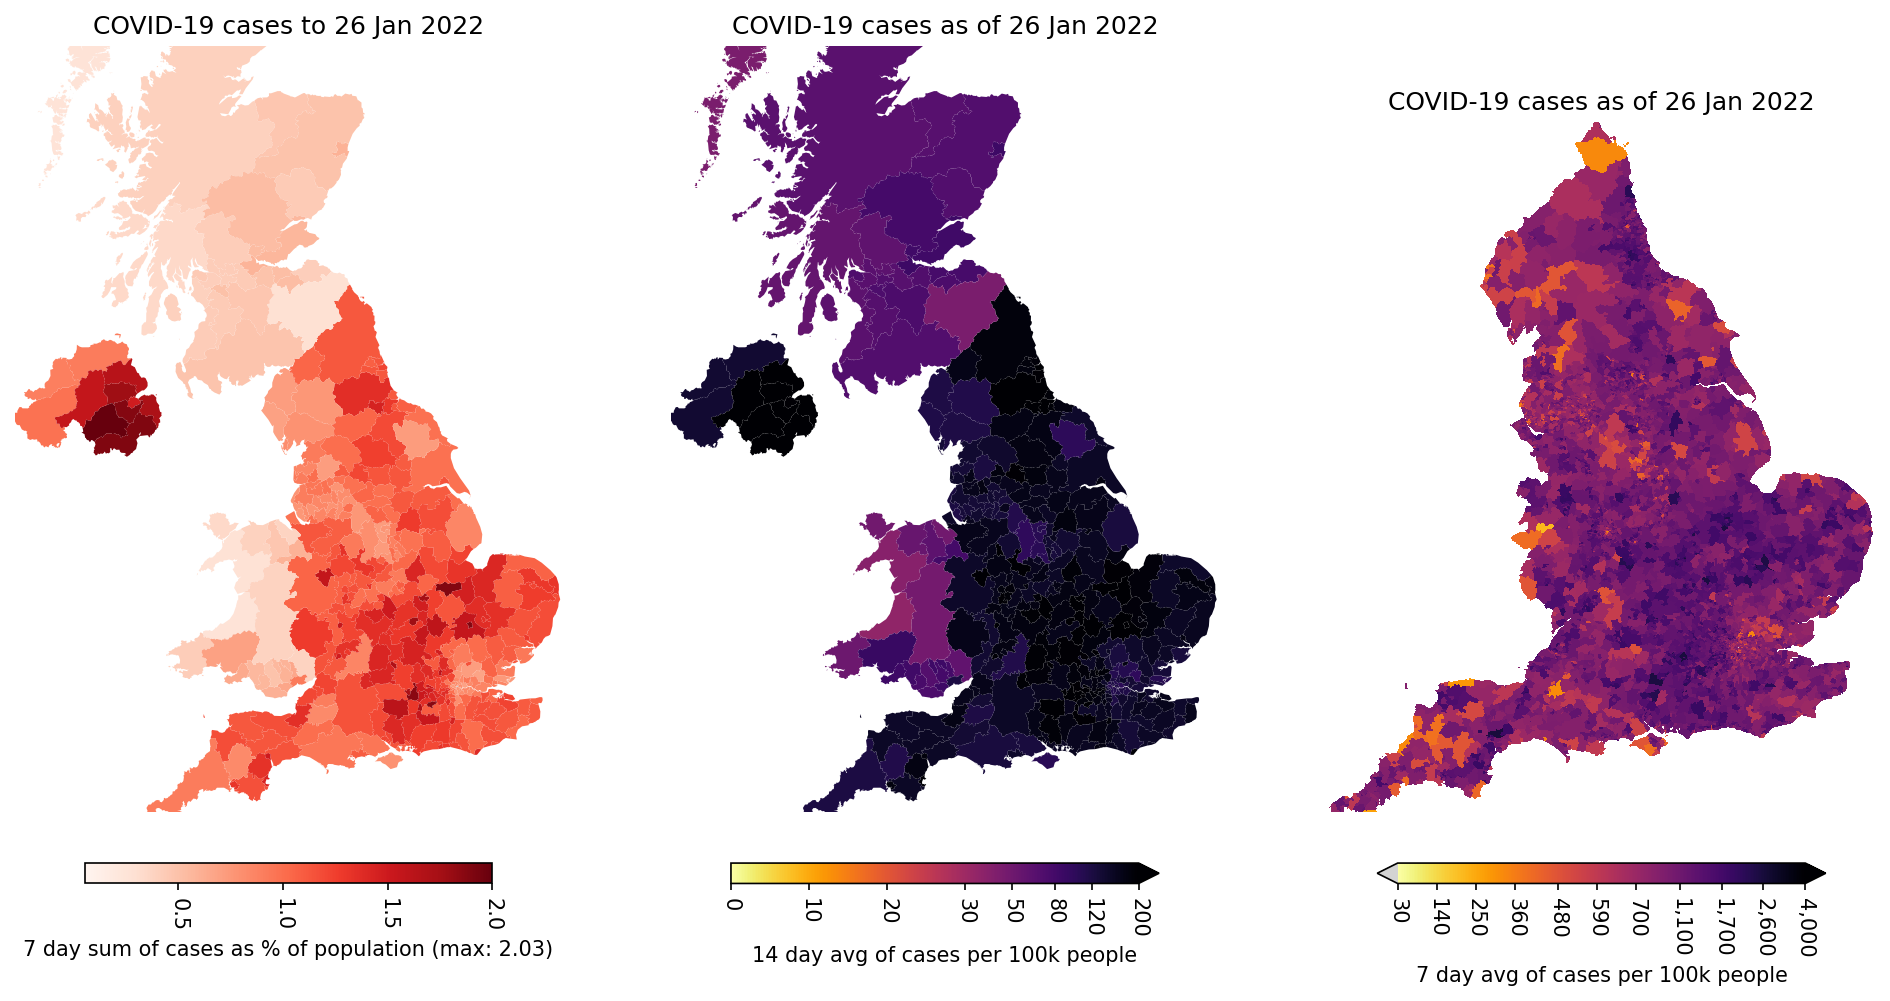

Loading BokehJS ...

In [18]:
case_maps(sum_vmax=2, exclude_days=4)